# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Read files

In [2]:
trozoC = pd.read_csv("TrozoC.txt", names=["LP", "VD"], 
                     delimiter="\t", skiprows = range(3), 
                     index_col=False, decimal=",")

trozoG = pd.read_csv("TrozoG.txt", names=["LP", "VD", "Time"], 
                     delimiter="\t", skiprows = range(3), 
                     index_col=False, decimal=",")

trozoR = pd.read_csv("TrozoR.txt", names=["LP", "VD"], 
                     delimiter="\t", skiprows = range(3), 
                     index_col=False, decimal=",")

In [5]:
trozoC.head()

,LP,VD
0,0.004883,0.015259
1,0.001526,0.024109
2,-0.010681,0.031128
3,-0.022278,0.041809
4,-0.028076,0.045471


# Establecer umbral

In [43]:
umbral = (trozoC.quantile(0.75)-trozoC.quantile(0.25))*1.5
#umbral = trozoC[trozoC>=0].mean() + 2*trozoC[trozoC>=0].std()

In [44]:
def filter_with_threshold(df, threshold):
    return (df > threshold).astype(int)

In [45]:
trozoC_t = filter_with_threshold(trozoC, umbral)

El número de elementos que superan el umbral es:

In [46]:
trozoC_t.sum()

LP     1937513
VD    15451427
dtype: int64

In [62]:
def compare_signal_and_transformation(df, df_t):
    """
    Muestra dos señales `df` y `df_t` que tengan las mismas dimensiones.
    """
    cols = df.shape[1] if len(df.shape) > 1 else 1
    fig, axs = plt.subplots(1, cols, figsize=(15,5))
    # Loop over columns
    for index in range(cols):
        # Get peaks for each column
        axs[index].plot(df.iloc[:, index])
        axs[index].plot(df_t.iloc[:,index])

Al aplicar la función sobre la señal original y la transformada (aplicando un escalado) podemos observar qué valores quedan por encima del umbral. Probamos con los primeros 100 valores.

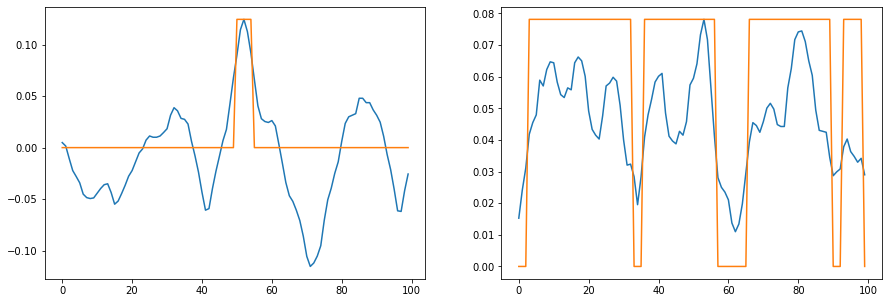

In [63]:
compare_signal_and_transformation(trozoC[0:100], trozoC_t[0:100]*trozoC[0:100].max())

# Calcular picos

In [37]:
def get_peaks(df):
    """
    Busca los picos correspondientes a cada columna del dataframe utilizando find_peaks. 
    Esta se queda con el valor medio de picos consecutivos.
    """
    # Get number of columns
    cols = df.shape[1] if len(df.shape) > 1 else 1
    # Initialize peaks array
    return [find_peaks(df.iloc[: , index])[0] for index in range(cols)]

El número total de picos encontrados es:

In [38]:
peaks = get_peaks(trozoC_t)
for i in peaks:
    print(len(i))

302460
956230


Ejemplo 

In [65]:
def compare_signal_and_peaks(df, peaks):
    """
    Muestra la señal original junto con los picos considerados.
    """
    cols = df.shape[1] if len(df.shape) > 1 else 1
    fig, axs = plt.subplots(1, cols, figsize=(15,5))
    # Loop over columns
    for index in range(cols):
        # Get peaks for each column
        axs[index].plot(df.iloc[:, index])
        axs[index].plot(peaks[index], df.iloc[peaks[index], index], "o")

Mostramos un ejemplo en los 100 primeros valores.

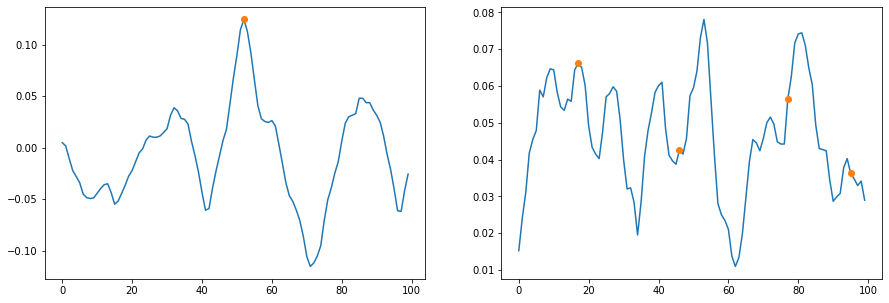

In [66]:
peaks = get_peaks(trozoC_t[0:100])
compare_signal_and_peaks(trozoC[0:100], peaks)